In [30]:
# LIBRERIAS DE USO
import numpy as np
import pandas as pd
from urllib.parse import urlparse
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [31]:
data_url = pd.read_csv("../data/URL_dataset.csv",header=0)
data_url = data_url.drop('Unnamed: 0',axis=1)
data_url.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [32]:
datosTotales = [tuple(x) for x in data_url.values]
print(f"Numero de URL de dataset: {len(datosTotales)}")

Numero de URL de dataset: 450176


## Extraer Caracteristicas de las URL's

In [33]:
def dimension_direccion(url):
    url_path = urlparse(url).path
    try:
        return len(url_path.split('/')[1])
    except:
        return 0 

In [34]:
# EXTRAEMOS EL LARGO DEL URL
data_url['largo_url'] = data_url['url'].apply(lambda x : len(x))
# EXTRAEMOS EL LARGO DEL HOSTNAME
data_url['largo_hostname'] = data_url['url'].apply(lambda x: len(urlparse(x).netloc))
# EXTRAEMOS LA DIMENSION DEL PATH
data_url['largo_path'] = data_url['url'].apply(lambda x: len(urlparse(x).path))
# Dimension del directorio
data_url['dimension_directorio'] = data_url['url'].apply(lambda x : dimension_direccion(x))

## Contabilizamos Caracteres

In [35]:
def detectar_numericos(url):
    cant_numeros = 0
    for i in url:
        if i.isnumeric():
            cant_numeros += 1
    return cant_numeros

def detectar_letras(url):
    cant_letras = 0
    for i in url:
        if i.isalpha():
            cant_letras += 1
    return cant_letras

def no_dir(url):
    url_dir = urlparse(url).path
    return url_dir.count('/')

In [36]:
data_url['num_guionesbajos'] = data_url['url'].apply(lambda x: len(re.findall('_', x)))
data_url['num_arrobas'] = data_url['url'].apply(lambda x: (x.count('@')))
data_url['num_interrogacion'] = data_url['url'].apply(lambda x: (x.count('?')))
data_url['num_percent'] = data_url['url'].apply(lambda x: (x.count('%')))
data_url['num_puntos'] = data_url['url'].apply(lambda x: (x.count('.')))
data_url['num_iguales'] = data_url['url'].apply(lambda x: (x.count('=')))
data_url['num_http'] = data_url['url'].apply(lambda x: (x.count('http')))
data_url['num_https'] = data_url['url'].apply(lambda x: (x.count('https')))
data_url['num_www'] = data_url['url'].apply(lambda x:(x.count('www')))
data_url['num_numericos'] = data_url['url'].apply(lambda x: detectar_numericos(x))
data_url['num_letras'] = data_url['url'].apply(lambda x: detectar_letras(x))
data_url['num_dir'] = data_url['url'].apply(lambda x: no_dir(x))

### Localizamos si el domino es una direccion IP


In [37]:
def localizacion_dirIP(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  
    if match:
        return -1
    else:
        return 1

def localizacion_servicio(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match: 
        return -1
    else:
        return 1
    

In [38]:
data_url['manejo_ip'] = data_url['url'].apply(lambda x: localizacion_dirIP(x))
data_url['servicio'] = data_url['url'].apply(lambda x: localizacion_servicio(x))

In [39]:
data_url.head()

,url,label,result,largo_url,largo_hostname,largo_path,dimension_directorio,num_guionesbajos,num_arrobas,num_interrogacion,...,num_puntos,num_iguales,num_http,num_https,num_www,num_numericos,num_letras,num_dir,manejo_ip,servicio
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


### Mapa de Correlaciones 
+ 1 : Correlacion Positiva fuerte
+ 0 : Sin Correlacion
+ -1: Correlacion negativa fuerte



C:\Users\jorge\AppData\Local\Temp\ipykernel_22212\916320424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data_url.corr()


<AxesSubplot: >

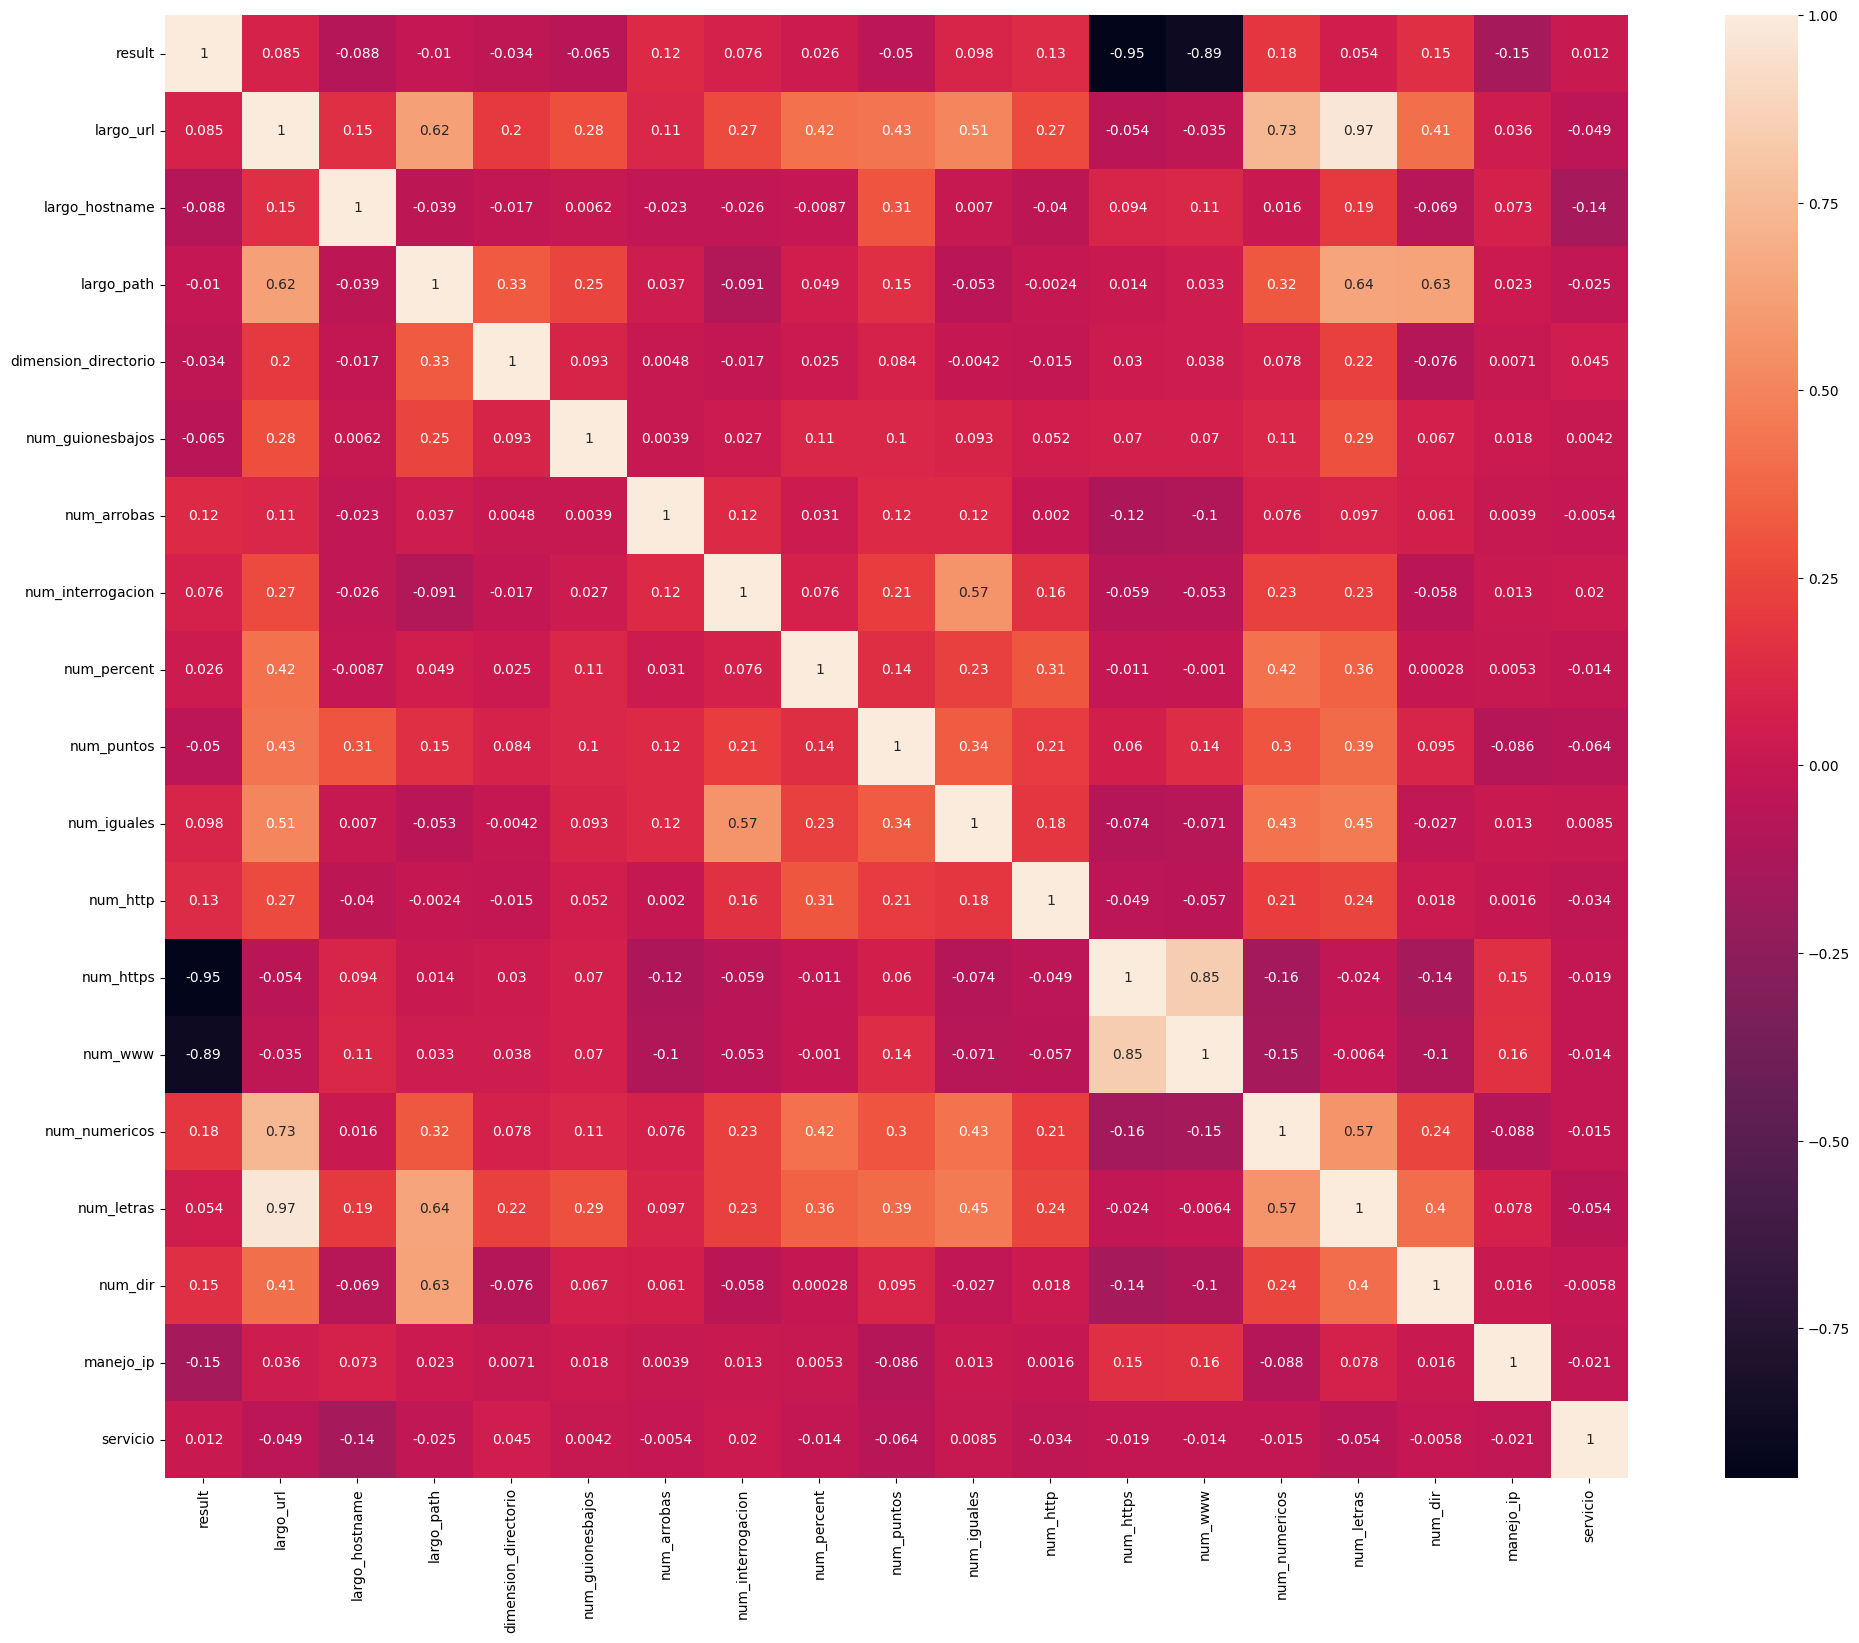

In [40]:
# Mapa de Correlaciones
corrmat = data_url.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [41]:
print("Porcentaje de URLs maliciosos: {:.2f}%".format(len(data_url[data_url['label']=='malicious'])/len(data_url['label'])*100))
print("Porcentaje de URLs benignos: {:.2f}%".format(len(data_url[data_url['label']=='benign'])/len(data_url['label'])*100))

Porcentaje de URLs maliciosos: 23.20%
Porcentaje de URLs benignos: 76.80%


In [42]:
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    Tam_data = len(df)
    dife_per = int(Tam_data/n_per_cluster)
    data = None
    for i in tqdm(range(dife_per)):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(i,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,i,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

In [43]:
data_url_samp = get_clustered_Sample(df = data_url, n_per_cluster = 100, num_select_clusters = 2)
data_url_samp

100%|██████████| 4501/4501 [05:31<00:00, 13.58it/s]


,url,label,result,largo_url,largo_hostname,largo_path,dimension_directorio,num_guionesbajos,num_arrobas,num_interrogacion,...,num_iguales,num_http,num_https,num_www,num_numericos,num_letras,num_dir,manejo_ip,servicio,cluster
186071,https://www.facebook.com/group.php?gid=2526626...,benign,0,51,16,10,9,0,0,1,...,1,1,1,1,12,30,1,1,1,3237
361848,http://s522948764.online.de/ljkjljkj,malicious,1,36,20,9,8,0,0,0,...,0,1,0,0,9,21,1,1,1,3237
264953,https://www.nopatternrequired.com/2011/03/ice-...,benign,0,68,25,35,4,0,0,0,...,0,1,1,1,6,49,4,1,1,3237
289486,https://www.showcase.com/Oakland/Oakland-Port-...,benign,0,81,16,57,7,2,0,0,...,0,1,1,1,0,67,2,1,1,3237
407866,http://kitegacc.net/,malicious,1,20,12,1,0,0,0,0,...,0,1,0,0,0,15,1,1,1,3237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343477,https://www.ism.uw.edu.pl/,benign,0,26,17,1,0,0,0,0,...,0,1,1,1,0,18,1,1,1,3934
449903,http://peniuk.com/mail1.php?,malicious,1,28,10,10,9,0,0,1,...,0,1,0,0,1,20,1,1,1,3934
275892,https://www.profectio.com/logibec-groupe-infor...,benign,0,81,17,56,54,0,0,0,...,0,1,1,1,0,68,2,1,1,3934
301301,https://www.tennessee.gov/tsla/history/militar...,benign,0,60,17,35,4,0,0,0,...,0,1,1,1,1,49,4,1,1,3934


In [44]:
print("Porcentaje de URLs maliciosos: {:.2f}%".format(len(data_url_samp[data_url_samp['label']=='malicious'])/len(data_url_samp['label'])*100))
print("Porcentaje de URLs benignos: {:.2f}%".format(len(data_url_samp[data_url_samp['label']=='benign'])/len(data_url_samp['label'])*100))

Porcentaje de URLs maliciosos: 25.00%
Porcentaje de URLs benignos: 75.00%


In [64]:
data_url_samp.to_csv(header=False, index=False, path_or_buf="..\data\Data_Sampling.csv")